Importing the Dependencies

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn import svm
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import pickle


Data Collection and Analysis

PIMA Diabetes Dataset

In [8]:
# Data Collection and Loading the dataset
diabetes_dataset = pd.read_csv('diabetes.csv') 


In [10]:

# Displaying the first 5 rows of the dataset
print("First 5 rows of the dataset:")
print(diabetes_dataset.head())


First 5 rows of the dataset:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [12]:
# Getting the number of rows and columns in the dataset
print("\nShape of the dataset:")
print(diabetes_dataset.shape)



Shape of the dataset:
(768, 9)


In [14]:
# Statistical measures of the data
print("\nStatistical measures of the data:")
print(diabetes_dataset.describe())



Statistical measures of the data:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  


In [16]:
# Distribution of the Outcome column (Diabetic or Not)
print("\nDistribution of Outcome column:")
print(diabetes_dataset['Outcome'].value_counts())



Distribution of Outcome column:
Outcome
0    500
1    268
Name: count, dtype: int64


0 --> Non-Diabetic

1 --> Diabetic

In [18]:

# Grouping by Outcome to get the mean of each feature
print("\nMean values grouped by Outcome:")
print(diabetes_dataset.groupby('Outcome').mean())



Mean values grouped by Outcome:
         Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
Outcome                                                                      
0           3.298000  109.980000      68.184000      19.664000   68.792000   
1           4.865672  141.257463      70.824627      22.164179  100.335821   

               BMI  DiabetesPedigreeFunction        Age  
Outcome                                                  
0        30.304200                  0.429734  31.190000  
1        35.142537                  0.550500  37.067164  


In [26]:
# Separating the features and target variable
X = diabetes_dataset.drop(columns='Outcome', axis=1)  # Features
Y = diabetes_dataset['Outcome']  # Target variable


In [32]:
# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=42)


In [34]:
# Printing the shape of the split data
print("\nShape of the split data:")
print(X.shape, X_train.shape, X_test.shape)



Shape of the split data:
(768, 8) (614, 8) (154, 8)


Train Test Split

Training the Model

In [36]:
# --- Hyperparameter Tuning using RandomizedSearchCV ---
param_dist = {'C': randint(1, 10), 'gamma': ['scale', 'auto']}
random_search = RandomizedSearchCV(svm.SVC(kernel='linear'), param_distributions=param_dist, n_iter=10, cv=5, verbose=1, random_state=2, n_jobs=-1)
random_search.fit(X_train, Y_train)

print("\nBest Parameters from Random Search:")
print(random_search.best_params_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Parameters from Random Search:
{'C': 9, 'gamma': 'auto'}


In [37]:
# --- Training the SVM classifier ---
classifier = svm.SVC(kernel='linear', C=random_search.best_params_['C'], gamma=random_search.best_params_['gamma'])
classifier.fit(X_train, Y_train)


SVC(C=9, gamma='auto', kernel='linear')

Model Evaluation

Accuracy Score

In [40]:
# --- Cross-validation ---
cv_scores = cross_val_score(classifier, X_train, Y_train, cv=5)
print("\nCross-validation scores:")
print(cv_scores)
print("Average cross-validation score:", np.mean(cv_scores))



Cross-validation scores:
[0.76422764 0.78861789 0.77235772 0.7804878  0.81147541]
Average cross-validation score: 0.7834332933493269


In [42]:
# --- Evaluating the model's accuracy ---
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print("\nAccuracy score of the training data:", training_data_accuracy)

X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy score of the test data:", test_data_accuracy)



Accuracy score of the training data: 0.7882736156351792
Accuracy score of the test data: 0.7077922077922078


In [44]:
# --- Making a prediction for a new data point ---
input_data = (5, 166, 72, 19, 175, 25.8, 0.587, 51)  # Example input


In [46]:

# Converting the input data to a numpy array and reshaping it
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)


Making a Predictive System

In [48]:
# Making the prediction
prediction = classifier.predict(input_data_reshaped)
print("\nPrediction for the input data:", prediction)

if prediction[0] == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")



Prediction for the input data: [1]
The person is diabetic


C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Saving the trained model

In [50]:

# --- Saving the trained model ---
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))


In [52]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [54]:
# --- Making a prediction using the loaded model ---
prediction = loaded_model.predict(input_data_reshaped)
print("\nPrediction using the loaded model:", prediction)

if prediction[0] == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")



Prediction using the loaded model: [1]
The person is diabetic


C:\Users\Krishan Bhati\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [ ]:
# --- Printing the column names of the dataset ---
print("\nFeature Columns in the dataset:")
for column in X.columns:
    print(column)


Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age


In [72]:
# --- Learning Curves to detect underfitting or overfitting ---
train_sizes, train_scores, test_scores = learning_curve(
    classifier, X_train, Y_train, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))
# Calculating mean and standard deviation for the plot
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


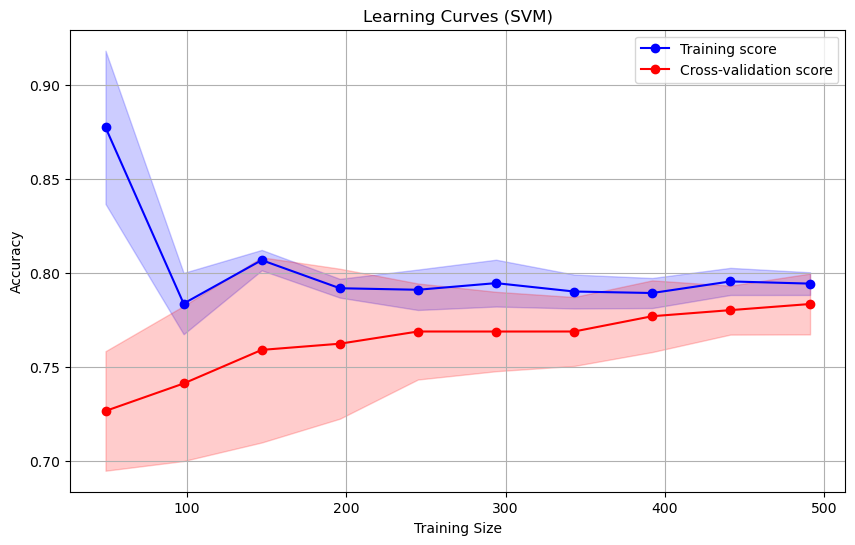

In [74]:
# Plotting the learning curves
plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, label="Training score", color="blue", marker="o")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score", color="red", marker="o")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, color="blue", alpha=0.2)
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, color="red", alpha=0.2)
# Adding title and labels
plt.title("Learning Curves (SVM)")
plt.xlabel("Training Size")
plt.ylabel("Accuracy")
plt.legend(loc="best")
plt.grid()
# Adding the legend
plt.legend()
# Show the plot
plt.show()


In [76]:
# --- Overfitting and Underfitting Detection ---
if train_scores_mean[-1] > test_scores_mean[-1]:
    if train_scores_mean[-1] - test_scores_mean[-1] > 0.1:
        print("\nWarning: Overfitting detected! Training accuracy is much higher than test accuracy.")
    else:
        print("\nThe model is fitting well, no strong overfitting detected.")
else:
    print("\nThe model might be underfitting as the training accuracy is low.")


The model is fitting well, no strong overfitting detected.
